In [0]:
!git clone https://github.com/titu1994/keras-coordconv.git
!cp keras-coordconv/coord.py coord.py

# must use numpy==1.16.1, 1.16.3 has allow pickle false by default
!pip install numpy==1.16.1


fatal: destination path 'keras-coordconv' already exists and is not an empty directory.


In [0]:
from keras import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import scipy
import random
from coord import CoordinateChannel2D

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

data_x = np.load('/content/gdrive/My Drive/1 to 8 2000/x_dataset.pkl')
data_y = np.load('/content/gdrive/My Drive/1 to 8 2000/y_dataset.pkl')

data_x = np.array(data_x)
data_y = np.array(data_y)

print(data_y[88][2])
print(np.shape(data_y))

[15.2 15. ]
(16000,)


We first need to turn the coordinates to images that can be fed into  a CNN

In [0]:
import os
# directory_x = "/content/gdrive/My Drive/project_set/1 to 12 dataset 20000/x_data/"
# directory_y = "/content/gdrive/My Drive/project_set/1 to 12 dataset 20000/y_data/"

directory_x = "/1 to 12 dataset 20000/x_data/"
directory_y = "/1 to 12 dataset 20000/y_data/"

if not os.path.exists(directory_x):
    os.makedirs(directory_x)
    
if not os.path.exists(directory_y):
    os.makedirs(directory_y)

In [0]:
img_dataset_x = []
for n, state in enumerate(tqdm(data_x)):
#     image = np.random.normal(0, 0.05, (60,60))
    image = np.zeros((60,60))

    for point in state:
        x,y = point.astype(int)
        image[x][y] = 1
    img_dataset_x.append(image)
        
img_dataset_y = []
for n, state in enumerate(tqdm(data_y)):
#     image = np.random.normal(0, 0.05, (60,60))
    image = np.zeros((60,60))
    for point in state:
        x,y = point.astype(int)
        image[x][y] = 1
    img_dataset_y.append(image)


# img_dataset_x = []
# for n, state in enumerate(tqdm(data_x)):
#     image = np.zeros((58,58))
#     for point in state:
#         x,y = point.astype(int)
#         image[x][y] = 1
#     np.save(directory_x+str(n)+'.np', image)
        
# img_dataset_y = []
# for n, state in enumerate(tqdm(data_y)):
#     image = np.zeros((58,58))
#     for point in state:
#         x,y = point.astype(int)
#         image[x][y] = 1
#     np.save(directory_y+str(n)+'.np', image)

In [0]:
# print(img_dataset_y[0])
# print(np.shape(img_dataset_x))

x_train = np.array(img_dataset_x)
y_train = np.array(img_dataset_y)

x_train = x_train.reshape(-1,60,60,1)
y_train = y_train.reshape(-1,60,60,1)


In [0]:
# imgplot = plt.imshow(img_dataset_x[5])

In [0]:
# imgplot = plt.imshow(img_dataset_y[5])

now that our points are in image form we must proceed with the machine learnig phase

In [0]:
class DnCNN():
    def __init__(self, n_features, n_conv, channels, image_shape):
        self.model = Sequential()

        self.model.add(layers.Flatten(input_shape=image_shape))

        self.model.add(layers.Dense(1024))
        self.model.add(layers.LeakyReLU(alpha=0.2))
        self.model.add(layers.BatchNormalization(momentum=0.8))
        self.model.add(layers.Dense(512))
        self.model.add(layers.LeakyReLU(alpha=0.2))
        self.model.add(layers.BatchNormalization(momentum=0.8))
        self.model.add(layers.Dense(1024))
        self.model.add(layers.LeakyReLU(alpha=0.2))
        self.model.add(layers.BatchNormalization(momentum=0.8))
        self.model.add(layers.Dense(np.prod(image_shape), activation='sigmoid'))
        self.model.add(layers.Reshape(image_shape))
        
        

In [0]:
def run_test():
    test_img_idx = index = random.randint(0,len(img_dataset_x)-1)
    
    test = model.model.predict(x_train[test_img_idx].reshape((-1, 60, 60, 1)))
    
    
    plt.imshow(img_dataset_x[test_img_idx])
    plt.show()
    
    plt.imshow(test.reshape(60, 60))
    plt.show()
    
    plt.imshow(img_dataset_y[test_img_idx])
    plt.show()
    
    
class TestCallback(callbacks.Callback):
    def __init__(self):
        pass

    def on_epoch_end(self, epoch, logs={}):
        if epoch % 50 == 0:
            run_test()

In [0]:
model = DnCNN(2, 2, 1, (60,60,1))
# model.model.summary()
model.model.compile(optimizer=optimizers.RMSprop(), loss = losses.binary_crossentropy, metrics=['mse', 'accuracy'])

W0617 11:24:34.349923 139846289766272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 11:24:34.391674 139846289766272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 11:24:34.414800 139846289766272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 11:24:34.531334 139846289766272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0617 11:24:34.829880 

Epoch 1/100
16000/16000 [==============================] - 6s 376us/step - loss: 0.6768 - mean_squared_error: 0.2415 - acc: 0.5834


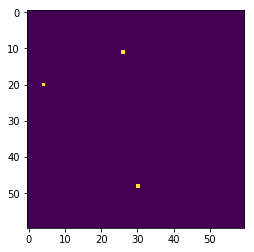

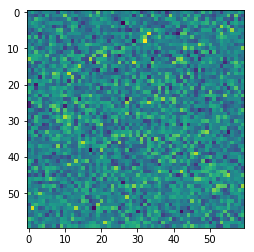

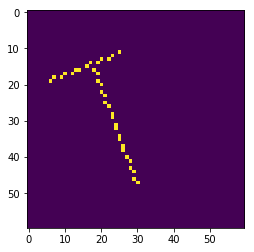

Epoch 2/100
16000/16000 [==============================] - 1s 93us/step - loss: 0.5266 - mean_squared_error: 0.1718 - acc: 0.7937
Epoch 3/100
16000/16000 [==============================] - 2s 94us/step - loss: 0.3327 - mean_squared_error: 0.0899 - acc: 0.9374
Epoch 4/100
16000/16000 [==============================] - 2s 94us/step - loss: 0.1885 - mean_squared_error: 0.0393 - acc: 0.9792
Epoch 5/100
16000/16000 [==============================] - 2s 94us/step - loss: 0.1116 - mean_squared_error: 0.0193 - acc: 0.9875
Epoch 6/100
16000/16000 [==============================] - 2s 94us/step - loss: 0.0743 - mean_squared_error: 0.0127 - acc: 0.9885
Epoch 7/100
16000/16000 [==============================] - 2s 94us/step - loss: 0.0626 - mean_squared_error: 0.0113 - acc: 0.9888
Epoch 8/100
16000/16000 [==============================] - 1s 94us/step - loss: 0.0589 - mean_squared_error: 0.0112 - acc: 0.9887
Epoch 9/100
16000/16000 [==============================] - 1s 94us/step - loss: 0.0584 - m

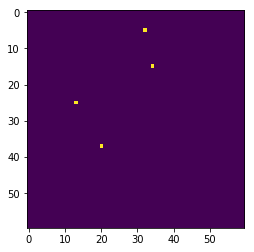

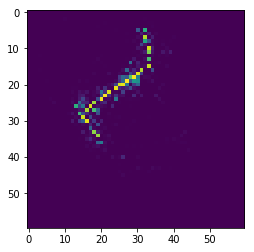

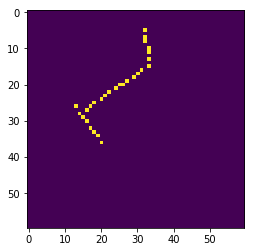

Epoch 52/100
16000/16000 [==============================] - 1s 92us/step - loss: 0.0102 - mean_squared_error: 0.0026 - acc: 0.9967
Epoch 53/100
16000/16000 [==============================] - 1s 92us/step - loss: 0.0097 - mean_squared_error: 0.0025 - acc: 0.9969
Epoch 54/100
16000/16000 [==============================] - 1s 92us/step - loss: 0.0092 - mean_squared_error: 0.0023 - acc: 0.9971
Epoch 55/100
16000/16000 [==============================] - 1s 93us/step - loss: 0.0088 - mean_squared_error: 0.0022 - acc: 0.9973
Epoch 56/100
16000/16000 [==============================] - 1s 92us/step - loss: 0.0084 - mean_squared_error: 0.0021 - acc: 0.9975
Epoch 57/100
16000/16000 [==============================] - 1s 92us/step - loss: 0.0079 - mean_squared_error: 0.0019 - acc: 0.9977
Epoch 58/100
16000/16000 [==============================] - 1s 93us/step - loss: 0.0076 - mean_squared_error: 0.0018 - acc: 0.9978
Epoch 59/100
16000/16000 [==============================] - 1s 92us/step - loss: 0.

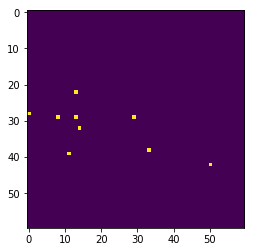

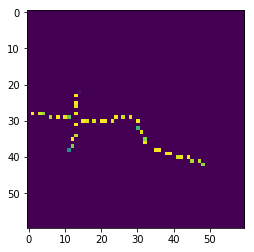

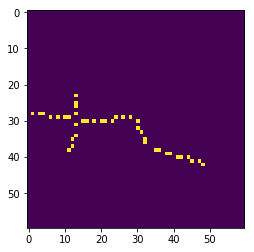

In [0]:
model.model.fit(x_train, y_train,
                shuffle=True,
          batch_size=1024,
          epochs=100,
          verbose=1, callbacks=[TestCallback()])
run_test()


In [0]:
sample = random.choice(x_train).reshape((-1, 60, 60, 1))


In [0]:
%%time
test = model.model.predict(sample)

CPU times: user 4.76 ms, sys: 0 ns, total: 4.76 ms
Wall time: 3.47 ms


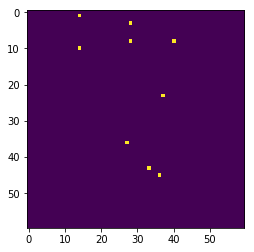

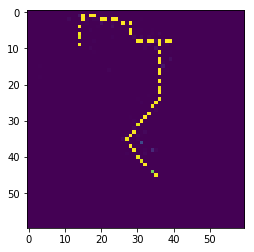

In [0]:
plt.imshow(sample.reshape(60, 60))
plt.show()


plt.imshow(test.reshape(60, 60))
plt.show()


In [0]:
model.model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3687424   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
__________

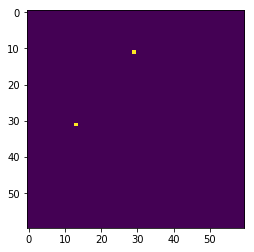

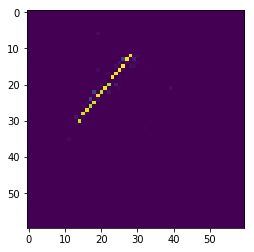

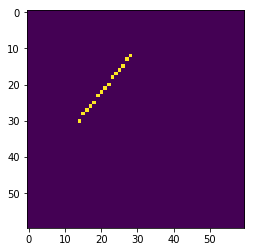

In [0]:
plt.imshow(img_dataset_x[1])
plt.show()

plt.imshow(model.model.predict(img_dataset_x[1].reshape((-1, 60, 60, 1))).reshape(60, 60))
plt.show()

plt.imshow(img_dataset_y[1])
plt.show()
